In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp

import math
import scipy.stats as stats
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import warnings
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

In [10]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

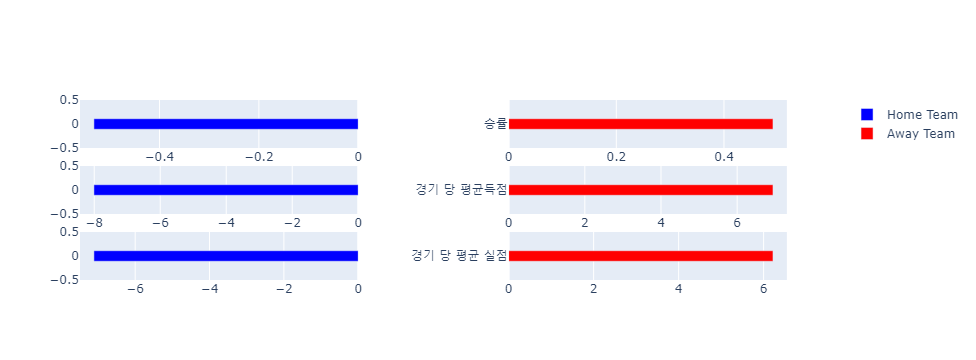

In [134]:
def convert_to_float(lst):
    return [float(x) for x in lst]

def visualize(L):

    sc = convert_to_float(L)

    home_values = sc[:3]
    away_values = sc[3:6]
    data_labels = ['승률', '경기 당 평균득점', '경기 당 평균 실점']
    bar_width = 0.22
    
    fig = make_subplots(rows=3, cols=2, specs=[[{'secondary_y': True}, {}]] * 3) # , shared_yaxes=True) # , specs=[[{'secondary_y': True}, {}]] * 3)
    
    # 승률
    fig.add_trace(go.Bar(x=[-home_values[0]], y=None, name='Home Team',
                       orientation='h',
                       marker=dict(color='blue'),
                       width=bar_width,
                         showlegend=False,
                       ), row=1, col=1)
    fig.add_trace(go.Bar(x=[away_values[0]], y=[data_labels[0]], name='Away Team',
                       orientation='h',
                       marker=dict(color='red'),
                       width=bar_width,
                         showlegend=False,
                       ), row=1, col=2)
    
    # 득점
    fig.add_trace(go.Bar(x=[-home_values[1]], y=None, name='Home Team',
                       orientation='h',
                       marker=dict(color='blue'),
                       width=bar_width,
                         showlegend=False,
                       ), row=2, col=1)
    fig.add_trace(go.Bar(x=[away_values[1]], y=[data_labels[1]], name='Away Team',
                       orientation='h',
                       marker=dict(color='red'),
                       width=bar_width,
                         showlegend=False,
                       ), row=2, col=2)
    
    # 실점
    fig.add_trace(go.Bar(x=[-home_values[2]], y=None, name='Home Team',
                       orientation='h',
                       marker=dict(color='blue'),
                       width=bar_width,
                       ), row=3, col=1)
    fig.add_trace(go.Bar(x=[away_values[2]], y=[data_labels[2]], name='Away Team',
                       orientation='h',
                       marker=dict(color='red'),
                       width=bar_width,
                       ), row=3, col=2)
    
#     # 득점 축 range 조정
#     fig.update_xaxes(showgrid = False, range=[-max_value, max_value], row=i + 1, col=1)
    
#     # 승률 축 range 조정
#     fig.update_xaxes(showgrid = False, range=[-max(away_values[0], home_values[0]), max(away_values[0], home_values[0])], row=i + 1, col=1)
    
    go.Layout(xaxis=dict(title='Indicators'),
                      
                      barmode='group',
                      bargap=0.1)
    
    

    # Display the graph
    fig.show()

# Example usage

# values = ['0.532', '8.01', '7.11', '0.491', '6.94', '6.22']

L = ['0.532', '8.01', '7.11', '0.491', '6.94', '6.22']
visualize(L)

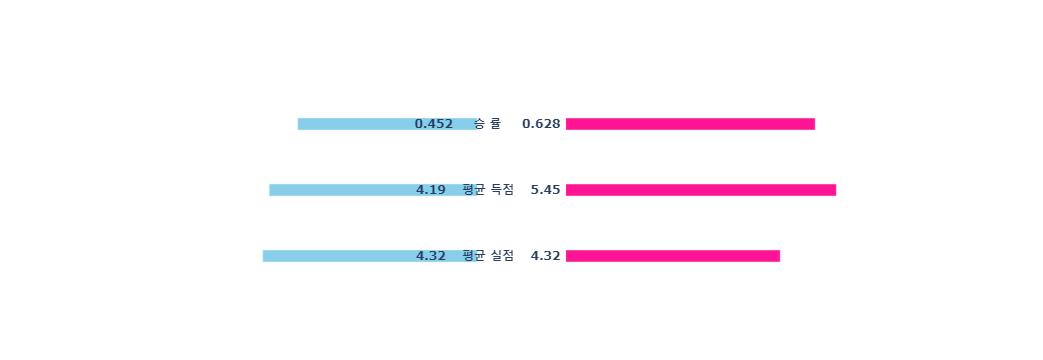

In [299]:
def convert_to_float(lst):
    return [float(x) for x in lst]

def visualize(L):
    
    # Home & Away 지표 나누기
    sc = L
    away_values = sc[:3]
    home_values = sc[3:6]
    
    # 승률, 팀득점평균, 실점평균 label -> bold, 지표 띄우기 위함
    data_labels = [f'{home_values[0]}     승 률     {away_values[0]} ', f'{home_values[1]}    평균 득점    {away_values[1]} ', f'{home_values[2]}    평균 실점    {away_values[2]} ']
    data_labels = [f"<b>{title}</b>" for title in data_labels]
    
    # float으로 converting
    away_values = convert_to_float(away_values)
    home_values = convert_to_float(home_values)
    
    bar_width = 0.25
    
    num_metrics = len(data_labels)
    num_cols = 2

    # 6개의 subplot 생성
    fig = sp.make_subplots(rows=num_metrics, cols=num_cols)

    # bar chart 생성
    for i, label in enumerate(data_labels):
        
        # 홈 팀 subplot
        fig.add_trace(
            go.Bar(
                x=[-home_values[i]],
                y=None,
                name='Away Team',
                orientation='h',
                marker=dict(color='skyblue'),
                width=bar_width,
                showlegend=False
            ),
            row=i+1,
            col=1
        )

        # 어웨이 팀 subplot
        fig.add_trace(
            go.Bar(
                x=[away_values[i]],
                y=[label],
                name='Home Team',
                orientation='h',
                marker=dict(color='deeppink'),
                width=bar_width,
                showlegend=False
            ),
            row=i+1,
            col=2
        )
                 
        # 축 조정
        if label == data_labels[0]:  # Check if it's the 5th or 6th column
            fig.update_xaxes(showgrid = False, range=[-1, 0], row=1, col=1, showticklabels=False)  
            fig.update_xaxes(showgrid = False, range=[0, 1], row=1, col=2, showticklabels=False)
            fig.update_yaxes(visible=False, row=i + 1, col=1)  
            fig.update_yaxes(visible=True, row=i + 1, col=2)
        else:
            fig.update_xaxes(showgrid = False, range=[-8, 0], row=2, col=1, showticklabels=False)
            fig.update_xaxes(showgrid = False, range=[0, 8], row=2, col=2, showticklabels=False)
            fig.update_xaxes(showgrid = False, range=[-8, 0], row=3, col=1, showticklabels=False)
            fig.update_xaxes(showgrid = False, range=[0, 8], row=3, col=2, showticklabels=False) 
            fig.update_yaxes(visible=False, row=i + 1, col=1)  
            fig.update_yaxes(visible=True, row=i + 1, col=2)
    

    # Update the layout
    fig.update_layout(
        height=250,
        width=1700,
        barmode='group',
        bargap=0.05,
        yaxis=dict(title=''),
        xaxis=dict(),
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)'
    )
    
    fig.update_traces(hovertemplate=' ')

    fig.show()
    
L = ['0.628', '5.45', '4.32', '0.452', '4.19', '4.32']
visualize(L)

In [87]:
# [Home팀승률, Home득점평균, Home실점평균, Away팀승률, Away득점평균, Away실점평균 ]
L = ['0.628', '5.45', '4.32', '0.452', '4.19', '4.32']

In [103]:
def convert_to_float(lst):
    return [float(x) for x in lst]

In [105]:
sc = convert_to_float(L)

In [107]:
sc[3:6]

[0.491, 6.94, 6.22]

In [ ]:
sc